# Applying the Random Forest algorithm to the Fraud Check dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
fraud=pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Random Forests\\Fraud_check.csv")

In [3]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [4]:
fraud.describe()

,City.Population,Work.Experience,Taxable.Income
count,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,55208.375000
std,49850.075134,8.842147,26204.827597
min,25779.000000,0.000000,10003.000000
25%,66966.750000,8.000000,32871.500000
50%,106493.500000,15.000000,55074.500000
75%,150114.250000,24.000000,78611.750000
max,199778.000000,30.000000,99619.000000


In [5]:
fraud.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'Taxable.Income'],
      dtype='object')

In [6]:
#converting taxable income data into 1 and 0 where 0 indicates income  <=30000 and 1 indicates  income >30000
fraud.loc[fraud['Taxable.Income']<=30000,'Taxable.Income']=0
fraud[fraud['Taxable.Income']<=30000]

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
10,NO,Single,102602,19,YES,0
12,NO,Divorced,148033,14,YES,0
16,YES,Divorced,34551,29,NO,0
19,NO,Single,126953,30,YES,0
21,YES,Divorced,29106,7,YES,0
...,...,...,...,...,...,...
544,NO,Single,133877,21,YES,0
557,YES,Married,157421,10,NO,0
567,YES,Single,129912,30,NO,0
575,NO,Divorced,95975,13,YES,0


In [7]:
fraud.loc[fraud['Taxable.Income']>30000,'Taxable.Income']=1
#fraud['Taxable.Income'].values[fraud['Taxable.Income']>30000]=1
fraud.head(20)

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,1
1,YES,Divorced,134075,18,YES,1
2,NO,Married,160205,30,YES,1
3,YES,Single,193264,15,YES,1
4,NO,Married,27533,28,NO,1
5,NO,Divorced,116382,0,NO,1
6,NO,Divorced,80890,8,YES,1
7,YES,Single,131253,3,YES,1
8,NO,Single,102481,12,YES,1
9,YES,Divorced,155482,4,YES,1


In [8]:
le=LabelEncoder()
fraud.Undergrad=le.fit_transform(fraud.Undergrad)
fraud.Undergrad

0      0
1      1
2      0
3      1
4      0
      ..
595    1
596    1
597    0
598    1
599    0
Name: Undergrad, Length: 600, dtype: int32

<AxesSubplot:xlabel='Undergrad', ylabel='Count'>

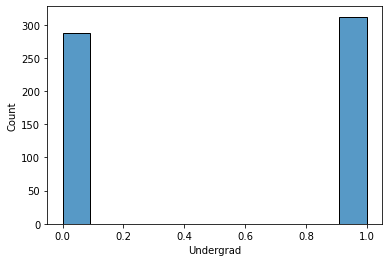

In [9]:
sns.histplot(fraud.Undergrad)

In [10]:
fraud['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [11]:
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud['Marital.Status']
#here single =2, Divorced=0 , Married=1

0      2
1      0
2      1
3      2
4      1
      ..
595    0
596    0
597    0
598    1
599    0
Name: Marital.Status, Length: 600, dtype: int32

<AxesSubplot:xlabel='Marital.Status', ylabel='Count'>

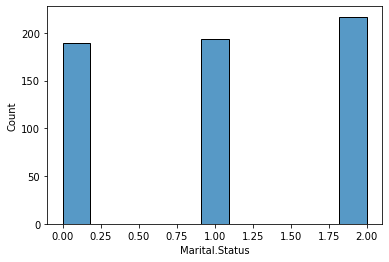

In [12]:
sns.histplot(fraud['Marital.Status'])

In [13]:
fraud['Work.Experience'].unique()

array([10, 18, 30, 15, 28,  0,  8,  3, 12,  4, 19,  6, 14, 16, 13, 29, 25,
       26,  7, 27,  5, 21, 23,  1, 22,  2, 11,  9, 24, 17, 20],
      dtype=int64)

<AxesSubplot:xlabel='Work.Experience', ylabel='Count'>

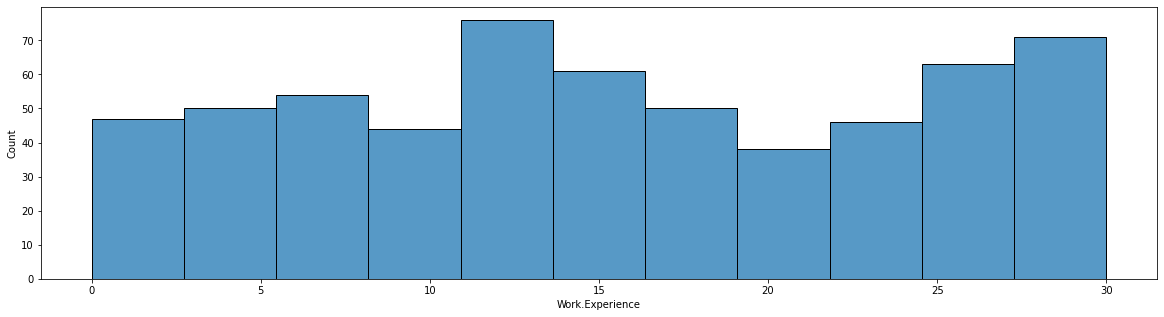

In [14]:
plt.figure(figsize=(20,5))
sns.histplot(fraud['Work.Experience'])

In [15]:
fraud.Urban=le.fit_transform(fraud.Urban)
fraud.Urban

0      1
1      1
2      1
3      1
4      0
      ..
595    1
596    1
597    1
598    0
599    0
Name: Urban, Length: 600, dtype: int32

<AxesSubplot:xlabel='Urban', ylabel='Count'>

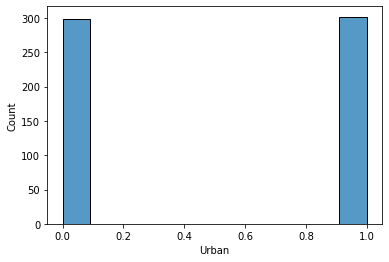

In [16]:
sns.histplot(fraud.Urban)

In [17]:
fraud.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [18]:
fraud['Taxable.Income'].value_counts()  #476+124=600 where 79.3% is Class 1 and 20.66% is Class 0 which implies the data is imbalanced data

1    476
0    124
Name: Taxable.Income, dtype: int64

<AxesSubplot:xlabel='Taxable.Income', ylabel='Count'>

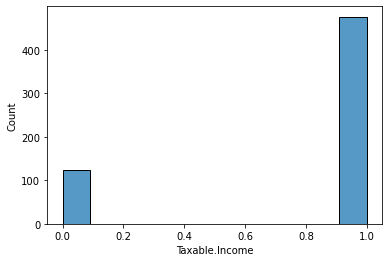

In [19]:
sns.histplot(fraud['Taxable.Income'])

In [20]:
#pip install imbalanced-learn

In [21]:
X=fraud.iloc[:,:5]
Y=fraud.iloc[:,5:]

# Model Creation before Oversampling and Undersampling

In [22]:
num_trees=300
max_features=3
kfold=KFold(n_splits=10,random_state=None)
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean()*100)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: 

73.83333333333334


In [23]:
# Stacking Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print("Accuracy=",results.mean())

Accuracy= 0.7933333333333332


C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

# Lets use SMOTE from imblearn library to handle imbalance data

### Synthetic Minority Oversampling TEchnique, or SMOTE for short. This technique was described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.

### This procedure can be used to create as many synthetic examples for the minority class as are required. As described in the paper, it suggests first using random undersampling to trim the number of examples in the majority class, then use SMOTE to oversample the minority class to balance the class distribution.

In [24]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

###  We can use the Counter object to summarize the number of examples in each class to confirm the dataset was created correctly.

In [25]:
from collections import Counter
from numpy import where

In [26]:
# summarize class distribution
counter = Counter(Y)
print(counter)

Counter({'Taxable.Income': 1})


### We can update the example to first oversample the minority class to have 10 percent the number of examples of the majority class (e.g. about 1,000), then use random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class (e.g. about 2,000).

In [27]:
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.9)

### We can then chain these two transforms together into a Pipeline.

### The Pipeline can then be applied to a dataset, performing each transformation in turn and returning a final dataset with the accumulation of the transform applied to it, in this case oversampling followed by undersampling.

In [28]:
steps=[('o',over),('u',under)]
pipeline=Pipeline(steps=steps)

### The pipeline can then be fit and applied to our dataset just like a single transform:

In [29]:
#Transform the Dataset by oversampling minority Class and Under-sampling Majority Class
X,Y=pipeline.fit_resample(X,Y)
#Summarize new Class Distribution
counter=Counter(Y)
print(counter)

Counter({'Taxable.Income': 1})


# scatter plot of examples by class label
for label, _ in counter.items():
 row_ix = where(Y == label)[0]
 plt.scatter(X[row_ix, 1], X[row_ix, 0], label=str(label))
plt.legend()
plt.show()

In [30]:
#now we can see that minority class increased and majority class decreased 
Y.value_counts()

Taxable.Income
1                 422
0                 380
dtype: int64

<AxesSubplot:ylabel='Count'>

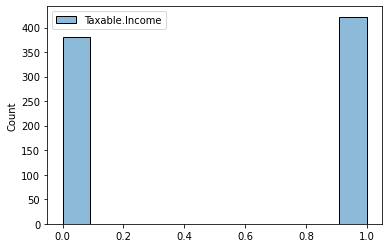

In [31]:
sns.histplot(Y)

# Model Creation after Oversampling and Undersampling

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=20)

In [33]:
num_trees=300
max_features=3
kfold=KFold(n_splits=10,random_state=None)
model=RandomForestClassifier(n_estimators=num_trees,max_features=max_features)
results=cross_val_score(model,x_train,y_train,cv=kfold)
print(results.mean()*100)

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: 

66.2844611528822


In [34]:
from yellowbrick import ClassBalance
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix , ROCAUC , ClassPredictionError

#classes=['No','Yes'] #Taxable Income

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


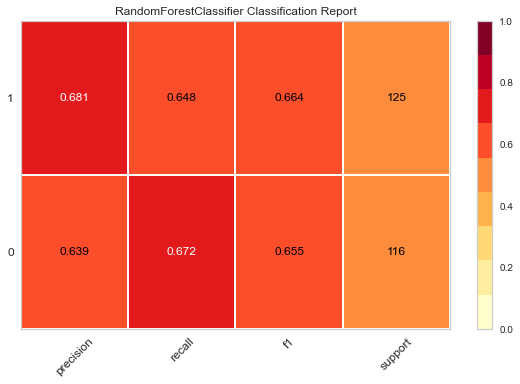

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [35]:
#Classification_Report 
cr_visualizer= ClassificationReport(model,support=True)
cr_visualizer.fit(x_train,y_train)
cr_visualizer.score(x_test,y_test)
cr_visualizer.show()

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


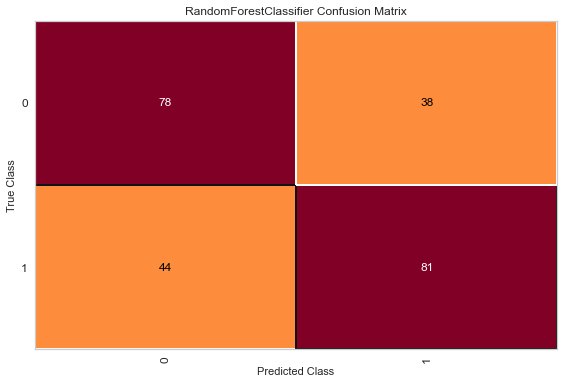

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [36]:
#confusion_matrix
cm= ConfusionMatrix(model)
cm.fit(x_train,y_train)
cm.score(x_test,y_test)
cm.show()

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


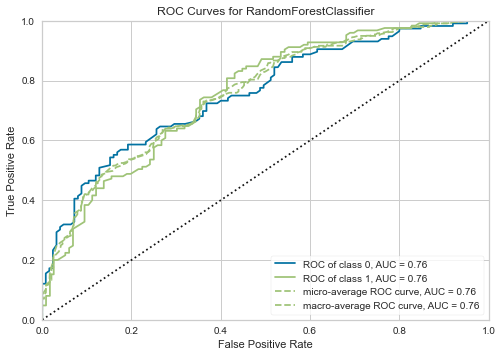

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [37]:
#Roc and AUC 
rocauc=ROCAUC(model)
rocauc.fit(x_train,y_train)
rocauc.score(x_test,y_test)
rocauc.show()

In [38]:
# Stacking Ensemble for Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

kfold = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x_train, y_train, cv=kfold)
print("Accuracy=",results.mean())

Accuracy= 0.5240601503759398


C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

# We can observe that accuracy decreased when we used SMOTE to oversample the minority class and undersample the majority class. 

# Let's use LazyPredict to check which algorithms have the highest accuracy on this dataset.

In [39]:
from lazypredict.Supervised import LazyClassifier
d=LazyClassifier(verbose=0,ignore_warnings=False,custom_metric=None)
models,predictions=d.fit(x_train,x_test,y_train,y_test)
print(models)


 41%|████▏     | 12/29 [00:00<00:00, 55.58it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████| 29/29 [00:00<00:00, 51.93it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.70               0.70     0.70      0.70   
SVC                                0.69               0.69     0.69      0.69   
XGBClassifier                      0.69               0.69     0.69      0.69   
NuSVC                              0.68               0.68     0.68      0.68   
BaggingClassifier                  0.66               0.67     0.67      0.66   
QuadraticDiscriminantAnalysis      0.67               0.67     0.67      0.67   
AdaBoostClassifier                 0.66               0.66     0.66      0.66   
GaussianNB                         0.66               0.66     0.66      0.66   
RandomForestClassifier             0.66               0.66     0.66      0.66   
Ex